# <font color='blue'><div style="text-align: center">Ch A. Time Series in Python </font>
    
* 시계열은 시간 순서에 따라 관측된 자료값을 등간격의 시간 순서로 나열한 자료를 의미함
* 이렇게 등간격의 시간 순서로 관측된 자료를 이산형 시계열(discrete time series)라고 한다.
* 예를 들어, 파도의 높이, 태양흑점의 수, 매일관측되는 다우지수값 등이 시계열이다. 

* 정상성(Stationarity): 시계열의 평균과 분산이 시간에 따라 일정하게 나타나는 성질을 정상성이라고 한다.
* Weakly Stationarity: 실제 데이터에서 시간에 따라 평균과 분산이 변하지 않는 것은 불가능하므로 약간의 변화가 있더라도 크게 봤을 때, 일정한 경향이 있다면  약 정상성을 가진다고 한다.

* 비정상성(Non-Stationaity): 시간에 따라 시계열이 증가 혹은 감소할 수도 있고, 주기를 가질 수도 있다. 이렇게 시간에 따라 평균이나 분산이 의미있게 변화하는 것을 비정상성이라고 한다.
  * Trend: 시간에 따라 전반적으로 증가하거나 감소하는 경향
  * Seasonality: 측정 주기를 기준으로 오르락 내리락 하는 경향으로 월별 아이스크림 판매량 등이 예다.




### <font color='blue'> Pandas Time Series Data Structure </font>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Get Google Trends data of keywords such as ‘diet’ and ‘gym’ and see how they vary over time 
df = pd.read_csv("multiTimeline.csv")
print(df.head())

     month  diet  gym  finance
0  2004-01   100   31       48
1  2004-02    75   26       49
2  2004-03    67   24       47
3  2004-04    70   22       48
4  2004-05    72   22       43


In [3]:
# df.month는 문자이므로 연산 불가능

a = df.month.tolist()
a[0:5]


['2004-01', '2004-02', '2004-03', '2004-04', '2004-05']

In [4]:
# df.month를 날짜로 바꿈

df.month = pd.to_datetime(df.month)
print(df.head())
df.set_index('month', inplace=True)

       month  diet  gym  finance
0 2004-01-01   100   31       48
1 2004-02-01    75   26       49
2 2004-03-01    67   24       47
3 2004-04-01    70   22       48
4 2004-05-01    72   22       43


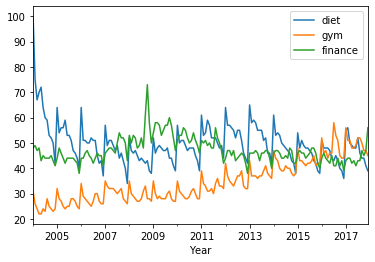

In [5]:
df.plot()
plt.xlabel('Year');

In [6]:
diet = df['diet']
diet_resamp_yr = diet.resample('A').mean() # A: 12개월 평균값 도출
diet_roll_yr = diet.rolling(12).mean() # 12개월 이동평균 도출


In [12]:
diet_resamp_yr 

month
2004-12-31    63.666667
2005-12-31    51.916667
2006-12-31    48.916667
2007-12-31    46.666667
2008-12-31    44.083333
2009-12-31    46.083333
2010-12-31    48.000000
2011-12-31    52.583333
2012-12-31    52.833333
2013-12-31    53.500000
2014-12-31    48.666667
2015-12-31    46.083333
2016-12-31    44.333333
2017-12-31    47.666667
Freq: A-DEC, Name: diet, dtype: float64

In [0]:
print(df['diet'][0:12].mean())
print(df['diet'][13:25].mean())

63.666666666666664
51.916666666666664


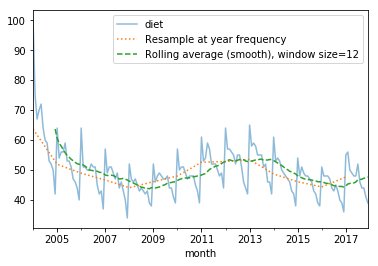

In [14]:
ax = diet.plot(alpha=0.5, style='-') # store axis (ax) for latter plots
diet_resamp_yr.plot(style=':', label='Resample at year frequency', ax=ax)
diet_roll_yr.plot(style='--', label='Rolling average (smooth), window size=12', ax=ax)
ax.legend()

Text(0.5, 0, 'Year')

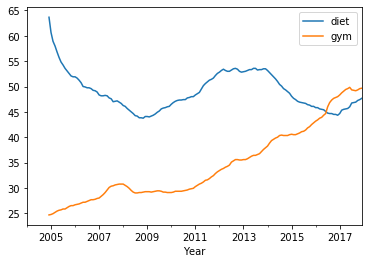

In [10]:
gym = df['gym']
df_avg = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df_avg.plot()
plt.xlabel('Year')

In [16]:
df_avg.corr()

,diet,gym
diet,1.000000,-0.298725
gym,-0.298725,1.000000


Text(0.5, 0, 'Year')

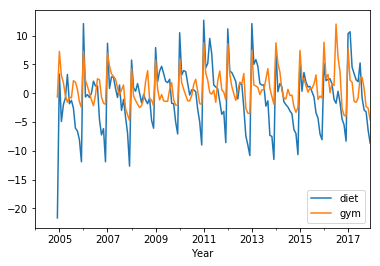

In [17]:
# de-trending (trend 영향 제거)
df_dtrend = df[["diet", "gym"]] - df_avg
df_dtrend.plot()
plt.xlabel('Year')

* 차분(Differencing) : 차분은 비정상 시계열을 정상시계열로 바꾸기 위한 변수변환이다.

    $ \Delta Y_t = Y_t - Y_{t-1} $ <br>
    $ \Delta^2 Y_t = \Delta Y_t - \Delta Y_{t-1} $

Text(0.5, 0, 'Year')

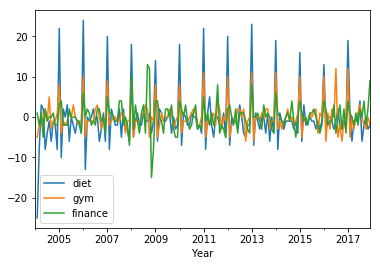

In [18]:
# 1차 차분
# 계절성 경향 존재

df.diff().plot()
plt.xlabel('Year')

Text(0.5, 0, 'Year')

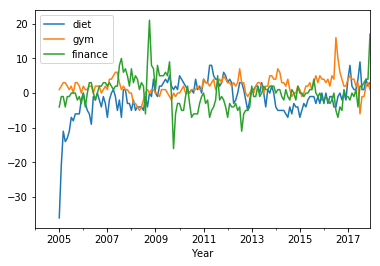

In [19]:
# 12차 차분을 통해 계절성을 제거함
df.diff(12).plot()
plt.xlabel('Year')

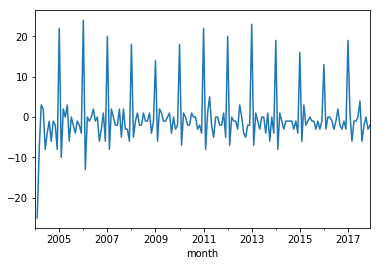

In [20]:
y = df['diet']
y1 = y.diff(1)
y1.plot()
# is stationary?

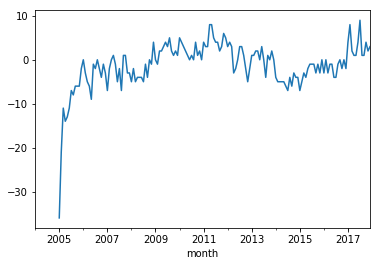

In [21]:
y12 = y.diff(12)
y12.plot()
# is stationary?

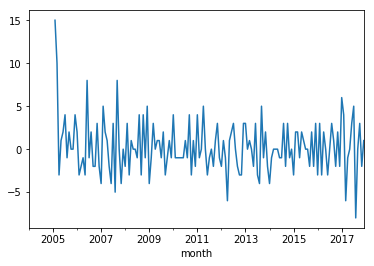

In [22]:
y1_12 = y1.diff(12)
y1_12.plot()
# is stationary?

### <font color='blue'> 시계열 성분 분해(Time Series Decomposition) </font>

In [11]:
gym

month
2004-01-01    31
2004-02-01    26
2004-03-01    24
2004-04-01    22
2004-05-01    22
2004-06-01    24
2004-07-01    23
2004-08-01    28
2004-09-01    25
2004-10-01    24
2004-11-01    23
2004-12-01    24
2005-01-01    32
2005-02-01    28
2005-03-01    27
2005-04-01    25
2005-05-01    24
2005-06-01    25
2005-07-01    25
2005-08-01    28
2005-09-01    28
2005-10-01    27
2005-11-01    25
2005-12-01    24
2006-01-01    34
2006-02-01    29
2006-03-01    28
2006-04-01    27
2006-05-01    26
2006-06-01    25
              ..
2015-07-01    42
2015-08-01    43
2015-09-01    45
2015-10-01    41
2015-11-01    42
2015-12-01    42
2016-01-01    52
2016-02-01    46
2016-03-01    47
2016-04-01    44
2016-05-01    46
2016-06-01    46
2016-07-01    58
2016-08-01    53
2016-09-01    51
2016-10-01    45
2016-11-01    44
2016-12-01    44
2017-01-01    56
2017-02-01    51
2017-03-01    51
2017-04-01    48
2017-05-01    48
2017-06-01    49
2017-07-01    52
2017-08-01    52
2017-09-01    50
2017-10-

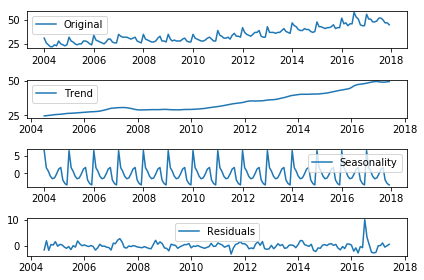

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
y = gym
y = y.astype(float) # force float
decomposition = seasonal_decompose(y)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(y, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### <font color='blue'> Autocorrelation(ACF): 자기상관계수 </font>

$$ \text {Autocorrelation with time lag k} \rightarrow  Cor(Y_t , Y_{t-k}) $$

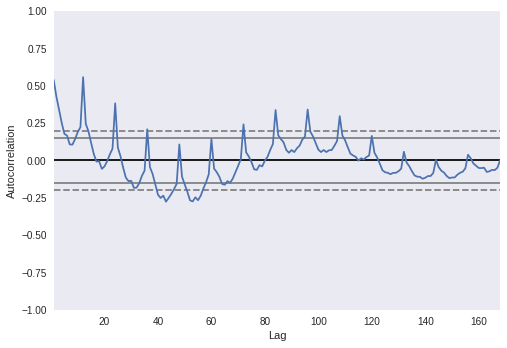

In [0]:
from pandas.plotting import autocorrelation_plot
y = df["diet"].astype(float)
autocorrelation_plot(y)
# ACF peaks every 12 months: Time series is correlated with itself shifted by 12 months

### <font color='blue'> ARiMA </font>
ARIMA model is transformed into stationary time series through the difference and fitting as ARMA model.

* AR(p) : ARIMA(p,0,0)
* MA(q) : ARIMA(0,0,q)
* ARMA(p,q) : ARIMA(p,0,q)
* iMA(d,q) : ARIMA(0,d,q)

$ Y_t \sim ARiMA(p,1,q) \rightarrow \Delta Y_t \sim ARMA(p,q) $

$ \text{AR(1): } Y_t = a_1 Y_{t-1} + \epsilon_t $
$ \text{AR(2): } Y_t = a_1 Y_{t-1} + a_2 Y_{t-2} + \epsilon_t $
$ \text{MA(2): } Y_t = b_1 \epsilon_{t-1} + b_2 \epsilon_{t-2} + \epsilon_t $
$ \text{ARMA(2,1): } Y_t - a_1 Y_{t-1} - a_2 Y_{t-2}  = b_1 \epsilon_{t-1} + \epsilon_t $

ARMA(p,q): <br>
$$ (1- \phi_1 L - \phi_2 L^2 - \cdots - \phi_p L^p ) (Y_t - \mu ) =  (1 - \theta_1 L - \cdots - \theta_q L^q) \epsilon_t , $$
$ where\  \phi_1 LY_t = \phi_1 Y_{t-1}, \phi_p L^p Y_t = \phi_p Y_{t-p}$ <br>

$\text{ARIMA(p,d,q)(P,D,Q)s, where d, D is differencing order} $
$\text{ARIMA(p,d,q)(P,D,Q)s } \rightarrow ARMA(p,q)(P,Q)s $

Seasonal ARMA(p,q)(P,Q)s: <br>
$$ (1- \phi_1 L - \phi_2 L^2 - \cdots - \phi_p L^p ) (1- \phi'_1 L^s - \phi'_2 L^{2s} - \cdots - \phi'_p L^{ps} )(Y_t - \mu ) =  (1 - \theta_1 L - \cdots - \theta_q L^q)(1 - \theta'_1 L^s - \cdots - \theta'_q L^{sq}) \epsilon_t  $$ <br>

Select the appropriate p, q, P, Q.


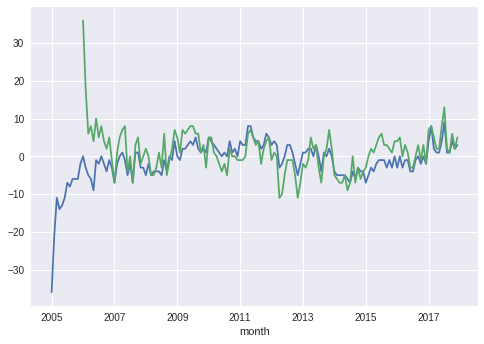

In [0]:
# find that d, D from original time series y
y12 = y.diff(12)
y12.plot()
y24 = y12.diff(12)
y24.plot()
# we select D = 12

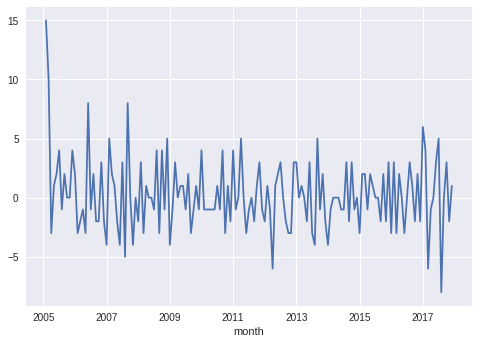

In [0]:
y12_1 = y12.diff(1)
y12_1.plot()
# we select d=1

                              ARMA Model Results                              
Dep. Variable:                   diet   No. Observations:                  121
Model:                     ARMA(1, 1)   Log Likelihood                -399.318
Method:                       css-mle   S.D. of innovations              6.523
Date:                Fri, 16 Nov 2018   AIC                            806.635
Time:                        08:21:15   BIC                            817.818
Sample:                    01-01-2004   HQIC                           811.177
                         - 01-01-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.3563      6.595      8.394      0.000      42.431      68.281
ar.L1.diet     0.9504      0.051     18.769      0.000       0.851       1.050
ma.L1.diet    -0.4651      0.118     -3.947      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: 6604.1861')

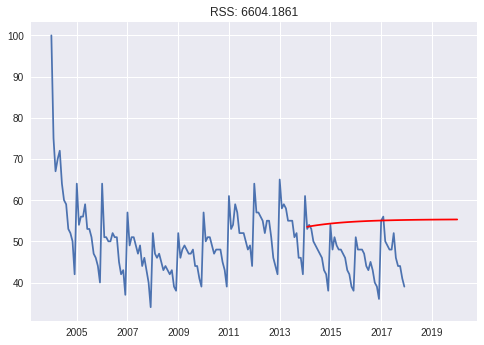

In [0]:
from statsmodels.tsa.arima_model import ARMA
from pandas import datetime

y_train = y[:'2014-01-01']
y_test = y['2014-02-01':]

# non seasonal ARIMA model
model = ARMA(y_train, order=(1, 1)).fit() # fit model
print(model.summary())
plt.plot(y)
start_index = datetime(2014, 2, 1)
end_index = datetime(2020, 1, 1)
plt.plot(model.predict(start=start_index, end=end_index), color='red')
plt.title('RSS: %.4f'% sum((model.fittedvalues-y_train)**2))

In [0]:
model.predict(start=start_index, end=end_index)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


2014-02-01    53.518478
2014-03-01    53.609641
2014-04-01    53.696281
2014-05-01    53.778624
2014-06-01    53.856882
2014-07-01    53.931259
2014-08-01    54.001946
2014-09-01    54.069127
2014-10-01    54.132976
2014-11-01    54.193658
2014-12-01    54.251330
2015-01-01    54.306141
2015-02-01    54.358233
2015-03-01    54.407742
2015-04-01    54.454795
2015-05-01    54.499513
2015-06-01    54.542014
2015-07-01    54.582407
2015-08-01    54.620796
2015-09-01    54.657281
2015-10-01    54.691956
2015-11-01    54.724911
2015-12-01    54.756231
2016-01-01    54.785998
2016-02-01    54.814289
2016-03-01    54.841176
2016-04-01    54.866730
2016-05-01    54.891016
2016-06-01    54.914097
2016-07-01    54.936033
                ...    
2017-08-01    55.139404
2017-09-01    55.150165
2017-10-01    55.160392
2017-11-01    55.170111
2017-12-01    55.179349
2018-01-01    55.188128
2018-02-01    55.196472
2018-03-01    55.204402
2018-04-01    55.211939
2018-05-01    55.219102
2018-06-01    55

In [0]:
plt.plot(y)
start_index = datetime(2014, 2, 1)
end_index = datetime(2020, 1, 1)
plt.plot(model.predict(start=start_index, end=end_index), color='red')
plt.title('RSS: %.4f'% sum((model.fittedvalues-y_train)**2))

In [0]:
# seasonal ARIMA Model (d=1, D=1, s=12)
from statsmodels.tsa.statespace.sarimax import SARIMAX  
model = SARIMAX(y_train, order=(0,1,1), seasonal_order=(0,1,1,12))
results = model.fit()
print (results.summary())



                                 Statespace Model Results                                 
Dep. Variable:                               diet   No. Observations:                  121
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -271.740
Date:                            Fri, 16 Nov 2018   AIC                            549.480
Time:                                    08:32:25   BIC                            557.868
Sample:                                01-01-2004   HQIC                           552.887
                                     - 01-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1497      0.058     -2.562      0.010      -0.264      -0.035
ma.S.L12      -0.4466      0.101   

The Ljung-Box test is used to check if exists autocorrelation in a time series. 
The statistic is

$$ Q = n(n+2) \sum_{j=1}^h \hat\rho(j)^2/(n-j) $$

p-value = 0.87 > sig. level = 0.05 <br>
-> There is no evidence that autocorrelation exists in error : White noise.

In [0]:
start_index = datetime(2017, 1, 1)
end_index = datetime(2019, 1, 1)
forecast = results.forecast(48)
forecast

2014-02-01    54.520455
2014-03-01    55.301293
2014-04-01    54.791087
2014-05-01    52.644966
2014-06-01    51.131144
2014-07-01    52.274379
2014-08-01    50.133650
2014-09-01    49.011260
2014-10-01    43.733437
2014-11-01    43.015609
2014-12-01    39.702682
2015-01-01    60.314178
2015-02-01    53.579995
2015-03-01    54.391421
2015-04-01    53.739109
2015-05-01    51.356767
2015-06-01    50.257555
2015-07-01    51.087126
2015-08-01    48.436471
2015-09-01    47.896117
2015-10-01    42.420241
2015-11-01    41.899270
2015-12-01    38.397919
2016-01-01    58.567477
2016-02-01    51.903126
2016-03-01    52.706164
2016-04-01    52.092823
2016-05-01    49.775262
2016-06-01    48.562348
2016-07-01    49.477938
2016-08-01    46.967125
2016-09-01    46.267153
2016-10-01    40.845592
2016-11-01    40.270634
2016-12-01    36.820957
2017-01-01    57.111712
2017-02-01    50.428211
2017-03-01    51.233549
2017-04-01    50.609520
2017-05-01    48.274194
2017-06-01    47.092462
2017-07-01    47

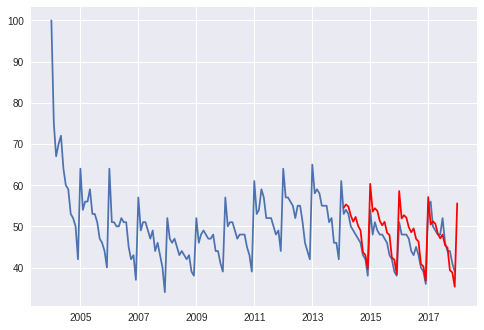

In [0]:
plt.plot(y)
start_index = datetime(2014, 2, 1)
end_index = datetime(2018, 1, 1)
plt.plot(results.forecast(48), color='red')


##### one step ahead prediction

- In sample (prediction): The expected value of the data (in-sample), given the estimates of the parameters.
- Out of sample (forecasting): The value of a future data that is not observed by the sample. <br>
![forecast](https://drive.google.com/uc?id=1EvtrJNEOhqs8KXBiwsedvGOWyXhqmhVK)

- one step ahead forecasting: 
$$ E(Y_{t+1} | Y_1, \cdots , Y_t) $$

##### Model selection(finding appropriate p, q, P, Q)

1. Fits all possible combinations p, q, P, Q(0<= p,q,P,Q <= 2)
2. Calculates the AIC of each models
3. Find the minimum AIC model.

<font color='red'> H.W #9:  Forecast the sales for 1 year from January 1994. </font>
https://robjhyndman.com/tsdldata/data/fancy.dat

monthly souvenir sales amount data(1987.1 ~ 1993.12)


### <font color='blue'> <div style="text-align: center">End of Chapter </font>  